In [6]:
import pandas
from utils import get_data
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

## Градиентный бустинг

In [7]:
X, y, X_test = get_data("clean")
k_folds = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

In [12]:
scores = []
nums = [10, 20, 30, 50, 60, 70]
for n in nums:
    print('Trees :', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=k_folds, scoring='roc_auc', n_jobs=-1)
    print('Time: ', datetime.datetime.now() - start_time)
    score_mean = np.mean(model_scores) 
    print(score_mean)
    scores.append(score_mean)

Trees : 10
Time:  0:00:16.581000
0.664850687975
Trees : 20
Time:  0:00:28.534000
0.682461876804
Trees : 30
Time:  0:00:41.850958
0.690006471039
Trees : 50
Time:  0:01:09.299929
0.697494360947
Trees : 60
Time:  0:01:20.548054
0.700119315674
Trees : 70
Time:  0:01:34.354434
0.702116541454


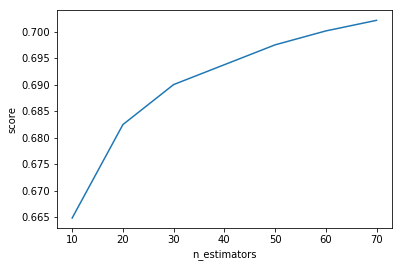

In [13]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

## Ответы

1. Взято из файла 1-data-explore

first_blood_player2            0.452402
radiant_flying_courier_time    0.282619
dire_flying_courier_time       0.268415
first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
dire_bottle_time               0.166029
radiant_bottle_time            0.161380
radiant_first_ward_time        0.018883
dire_first_ward_time           0.018780
radiant_courier_time           0.007117
dire_courier_time              0.006953

first_blood_player2 - первое убийство может быть совершено одним игроком, это явление происходит в 45% случаев
radiant_flying_courier_time - в 28% случаев команда не покупает “flying_courier” в первые 5 минут игры

2. radiant_win
3. Кросс-валидация для градиентного бустинга с 30 деревьями заняла 41.85 секунд и получилось качество : 0.69
4. Есть смысл использовать больше деревьев, как видно с графика, при этом качество классификации возрастает, но время обучения тоже сильно растет. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество. Также можно уменьшить глубину деревьев (max_depth).